# SCIENCE WORKFLOW FOR IN SITU MEASUREMENTS IN ISRO-ESA JOINT WORKSHOP 2026

This tutorial will guide the participants to work on multi-spacecraft in situ data analyses during a selected period.

**For the participants**
1. We will work with both the Aditya-L1 (ASPEX-STEPS, ASPEX-SWIS, MAG) and Solar Orbiter (EPD-EPT, EPD-SIS, EPD-STEP, MAG, SWA, etc.) data for a particular time interval with possible coordinated observations that could result in interesting heliophysics sciences.
2. Examples of pyhton codes to read and plot data for energetic ions and solar wind bulk parameters are provided for an interval.

**Tasks for the participants**
1. Download data from the google drive link (shared with you)
2. Use the given codes (optional) to overplot different types of data from Aditya-L1 and Solar Orbiter 
3. Investigate any simiarity or difference you see in these data

# Selected interval

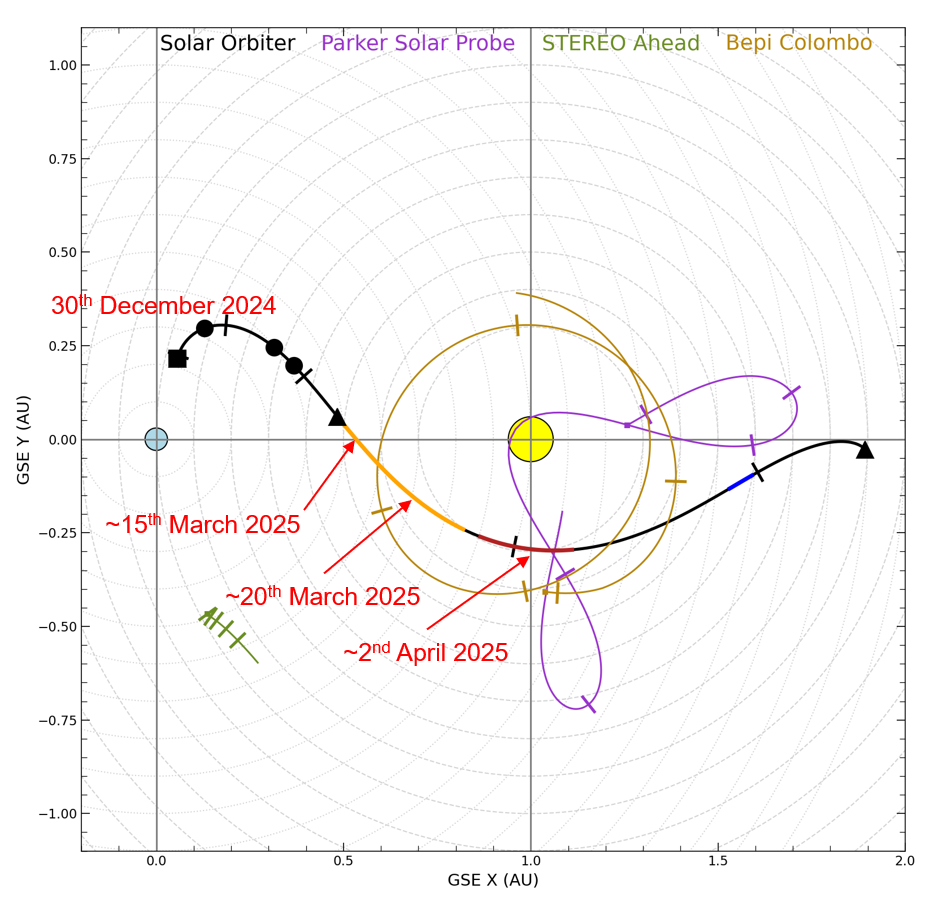

In [39]:
from IPython.display import Image
Image(r'C:\Users\Bijoy\Desktop\ISRO-ESA-workshop-Jan2026\science_workflow_insitu\Data for science workflow\Picture1.png')

Since we need to accomodate both solar wind structures and energetic particles, we select the follwoing interval from 15 March 2025 to 25 March 2025. Energetic particles generally travel along the interplanetary magnetic field. So magnetic connection is very important. 

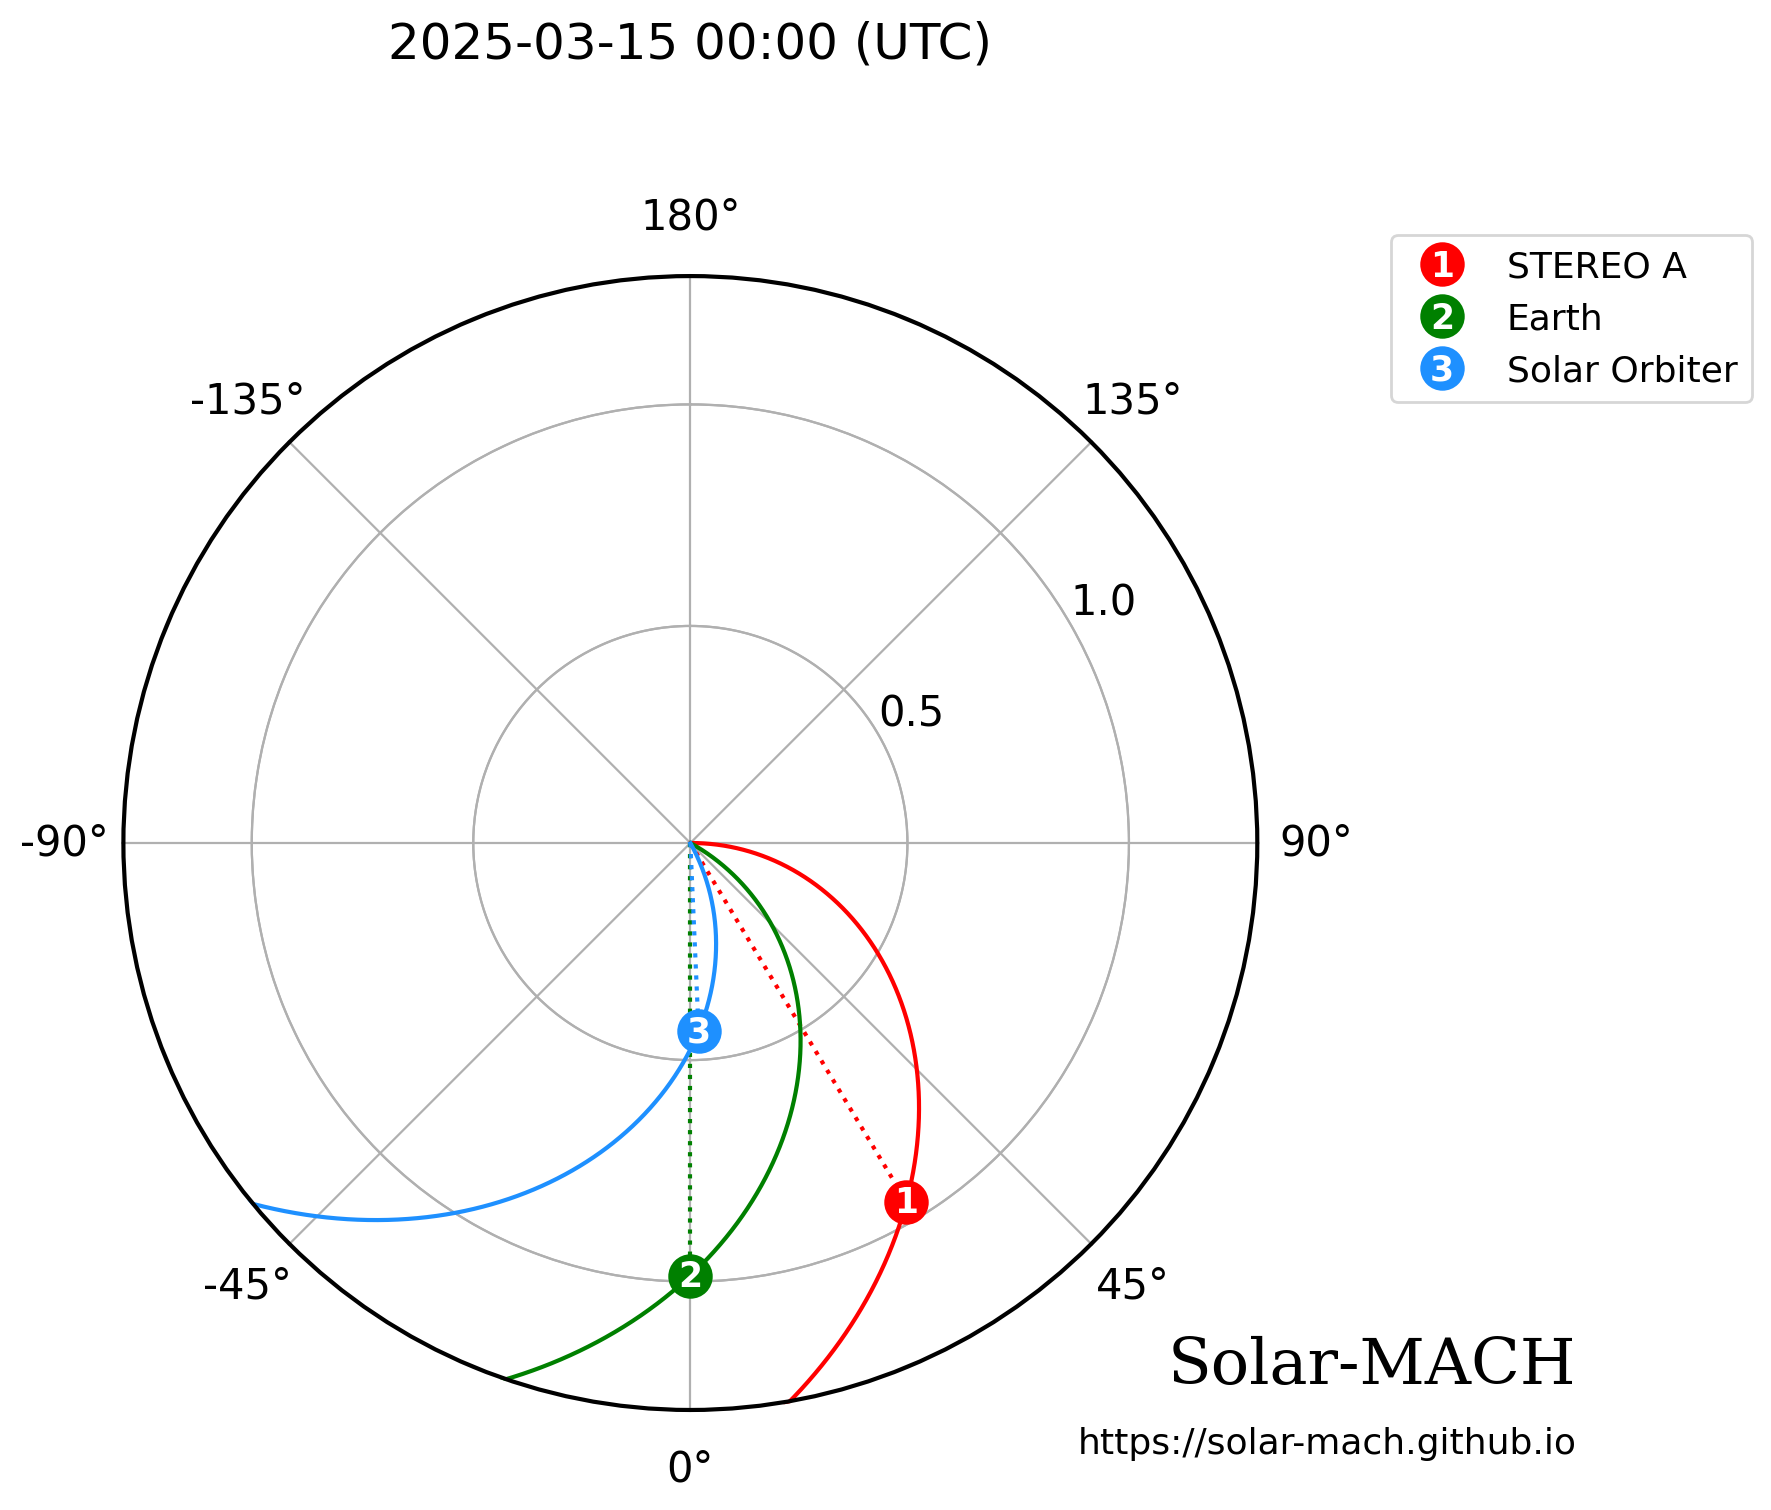

In [40]:
from IPython.display import Image
Image(r'C:\Users\Bijoy\Desktop\ISRO-ESA-workshop-Jan2026\science_workflow_insitu\Data for science workflow\Solar-MACH_2025-03-15_00-00.png')

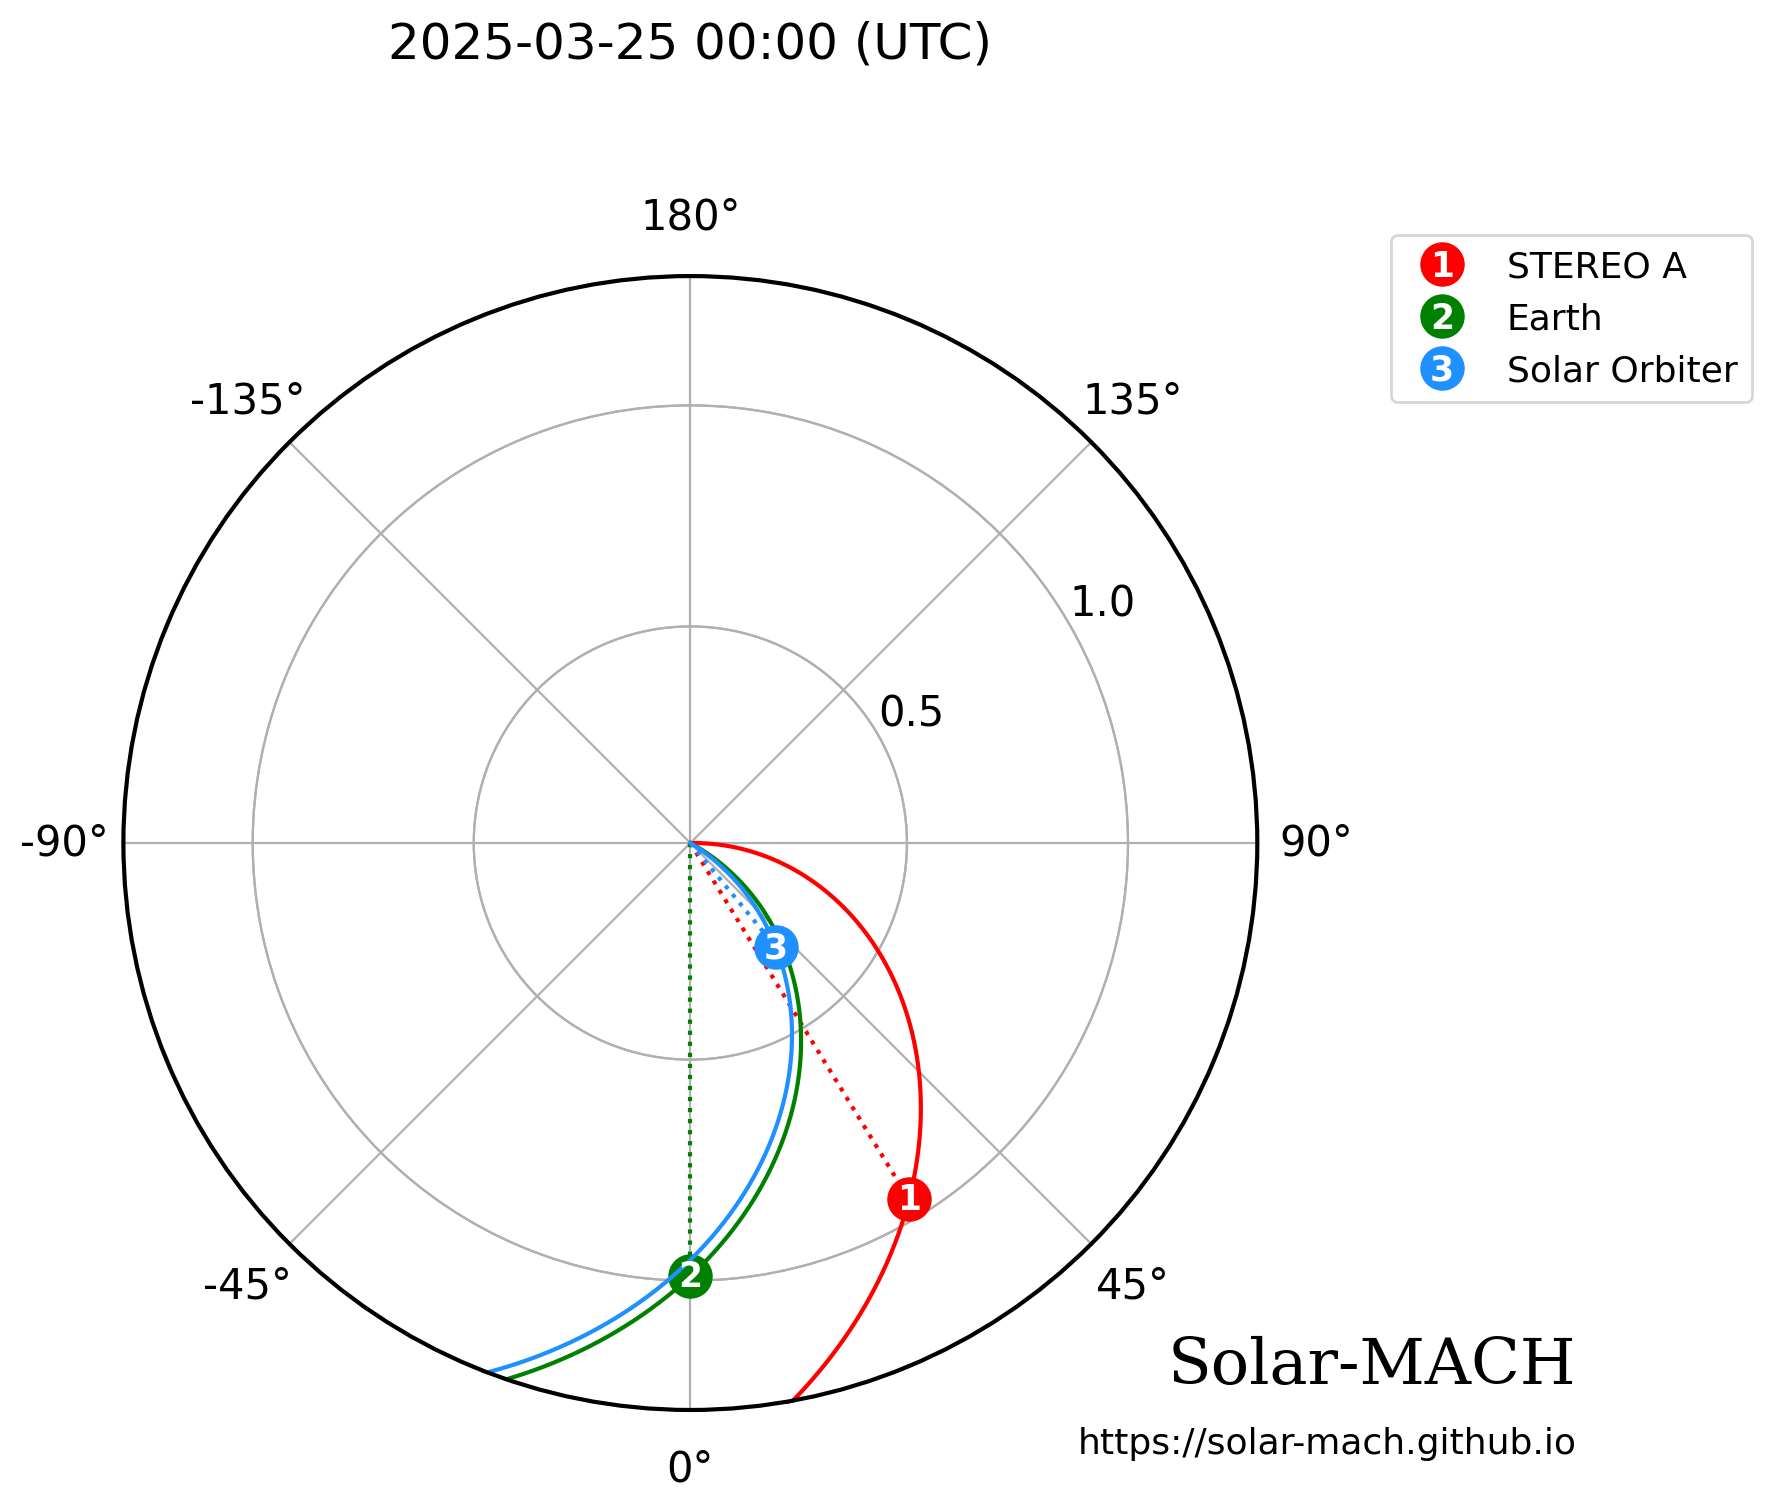

In [2]:
from IPython.display import Image
Image(r'C:\Users\Bijoy\Desktop\ISRO-ESA-workshop-Jan2026\science_workflow_insitu\Data for science workflow\Solar-MACH_2025-03-25_00-00.png')

During the interval from 15 March 2026 to 25 March 2026, Aditya-L1 and Solar Orbiter are expected to be either connected radially or magnetically thorugh interplanetary magnetic field. So, we choose this interval. 

We select interval from 15 March 2025 to 25 March 2025. During this period, Aditya-L1 and Solar Orbiter are supposed to be radially and magnetically connected. 

**For a 3D view of the positions of these spacecraft, please refer to https://solar-mach-pfss.streamlit.app/?embedded=true**
STEPS to follow: select date (time is optional) => select coordinate system as "Stonyhurst" => Select Earth and spacecraft of your choice => then press 'Enter' => scroll down: view the positions in 3D. 

In [3]:
# Install important libraries
# !pip install spacepy 
# !pip install netCDF4 
## same command is valid for all other modules also, if not already downloaded. Just replace 'netCDF4' by the name of module 

In [3]:
# Importing required python modules 
import numpy as np
import os
from datetime import datetime, date, timedelta, timezone
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import spacepy
from spacepy import pycdf

from dateutil.relativedelta import relativedelta
import pytz
import matplotlib.dates as mdates

C:\Users\Bijoy\anaconda3\lib\site-packages\spacepy\time.py:2448: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  _read_leaps()


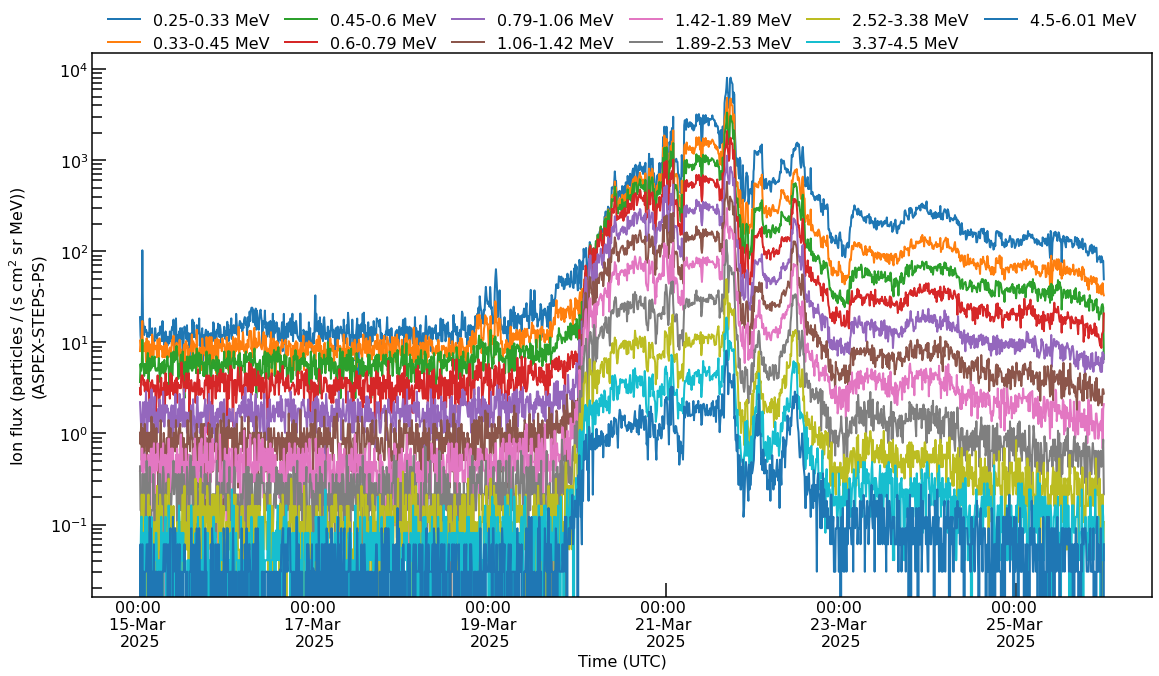

In [4]:
# Reading ASPEX-STEPS data (for PS direction only)
# You may try with other directions as well
file_2='C:\\Users\\Bijoy\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\AL1_ASPEX_STEPS\\'
file_2_list=os.listdir(file_2)
file = file_2+file_2_list[0]

cdf_data = pycdf.CDF(file)
# variable_names = cdf_data.keys()
# print(variable_names)
# ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
#---------------------------------------------------------------------------------------------        
# Reading and storing the variables        
ebin_steps_ps=cdf_data['Ebin_outer_allspecies']
# print(ebin_aspex_ps[:, :])
time_aspex_steps=cdf_data['Epoch']
# print(time_aspex_steps[0:10])
flux_steps_ps=cdf_data['PS_Outer_allspecies']

del file, cdf_data
# Reading the data for all the files in the given directory
for i in range(1,len(file_2_list)): 
    file = file_2+file_2_list[i]
    cdf_data = pycdf.CDF(file)
    
    time=cdf_data['Epoch']
    time_aspex_steps=np.concatenate((time_aspex_steps, time), axis=0)
    del time
    
    flux=cdf_data['PS_Outer_allspecies']
    flux_steps_ps=np.concatenate((flux_steps_ps, flux), axis=0)
    del flux
    del i, file, cdf_data
del file_2, file_2_list
# print(np.shape(flux_steps_ps))
# print(len(time_aspex_steps))   

# plot aspex-steps data
fig=plt.figure(1, figsize=(19, 10))
gs=fig.add_gridspec(1, 1, hspace=0.00, wspace=0.00)
ax=gs.subplots(sharex=True, sharey=True)

t1=datetime(2025, 3, 15, 0, 0, 0)  
t2=datetime(2025, 3, 26, 0, 0, 0)

n1=np.min(np.where(time_aspex_steps > t1))
n2=np.max(np.where(time_aspex_steps < t2))

fonts=16

for i in range(0, 11):
    ax.semilogy(time_aspex_steps[n1:n2+1], flux_steps_ps[n1:n2+1, i], '-', markersize=4, linewidth=2.,\
                    label=f'{np.round(ebin_steps_ps[i, 0], 2)}-{np.round(ebin_steps_ps[i, 1], 2)} MeV')
    del i 
    
ax.legend(ncol=6, loc='upper center', frameon=False, fontsize=fonts, markerscale=4., \
       columnspacing =1.0, bbox_to_anchor=(0.5, 1.1))
ax.set_ylabel('Ion flux (particles / (s cm$^{2}$ sr MeV)) \n(ASPEX-STEPS-PS)', fontsize=fonts)
ax.set_xlabel('Time (UTC)', fontsize=fonts)
ax.tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax.tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax.spines.values()]
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fonts)
    
myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax.xaxis.set_major_formatter(myFmt)
del myFmt

del fig, gs, ax, n1, n2, t1, t2, fonts


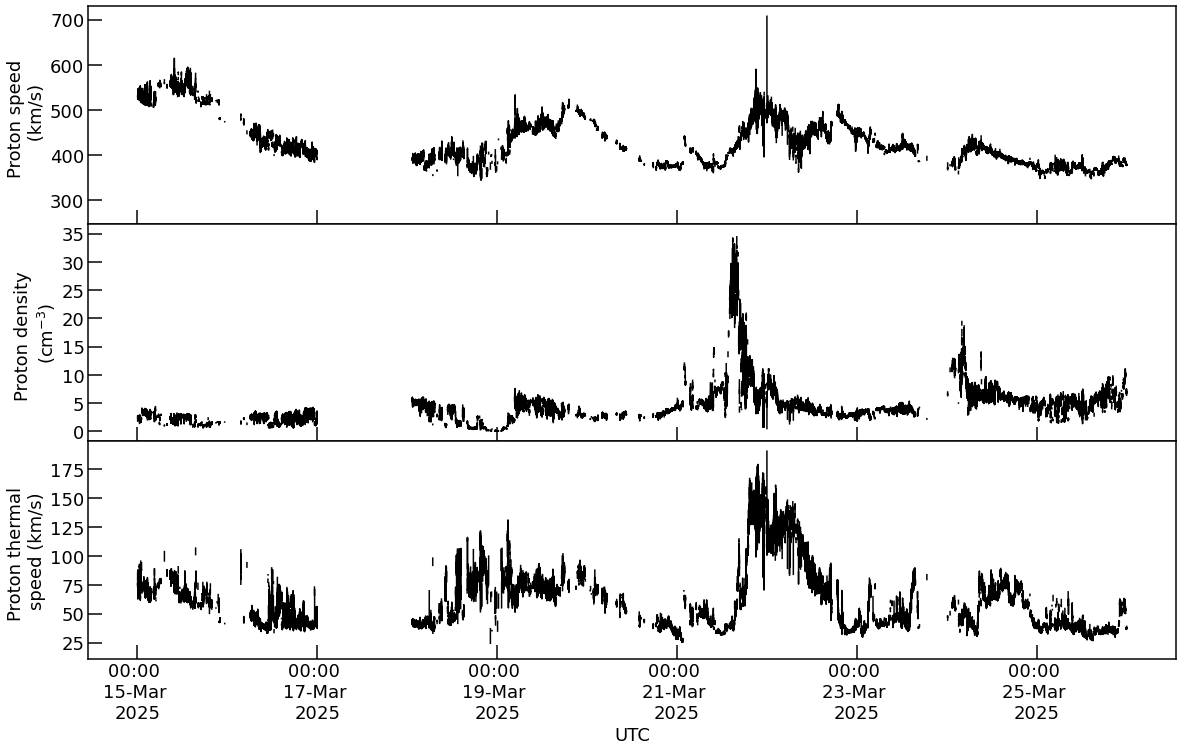

In [109]:
# Reading ASPEX-SWIS data (only bulk parameters)
file_2='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\AL1_ASPEX_SWIS\\'
file_2_list=os.listdir(file_2)
file = file_2+file_2_list[0]

cdf_data = pycdf.CDF(file)
variable_names = cdf_data.keys()
# print(variable_names)
# # ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
# # ---------------------------------------------------------------------------------------------  
p_speed_aspex_swis=cdf_data['proton_bulk_speed'] # km/s
p_dens_aspex_swis=cdf_data['proton_density'] # /cc
p_therm_aspex_swis= cdf_data['proton_thermal'] # km/s
time_aspex_swis=cdf_data['epoch_for_cdf_mod']

# print(time_aspex_swis[0:10])
del file, cdf_data

# # Reading the data for all the files in the given directory
for i in range(1,len(file_2_list)): 
    file = file_2+file_2_list[i]
    cdf_data = pycdf.CDF(file)
    
    speed=cdf_data['proton_bulk_speed']
    p_speed_aspex_swis=np.concatenate((p_speed_aspex_swis, speed), axis=0)
    del speed
    
    density=cdf_data['proton_density']
    p_dens_aspex_swis=np.concatenate((p_dens_aspex_swis, density), axis=0)
    del density
    
    thermal=cdf_data['proton_thermal']
    p_therm_aspex_swis=np.concatenate((p_therm_aspex_swis, thermal), axis=0)
    del thermal
    
    time= cdf_data['epoch_for_cdf_mod'] 
    time_aspex_swis=np.concatenate((time_aspex_swis, time), axis=0)
    del time
    
    del i, cdf_data, file
del file_2, file_2_list

# Replacing the filled values with nan
p_therm_aspex_swis[p_therm_aspex_swis<0]='nan'
p_dens_aspex_swis[p_dens_aspex_swis<0]='nan'
p_speed_aspex_swis[p_speed_aspex_swis<0]='nan'

# Plotting the ASPEX-SWIS data
t1=datetime(2025, 3, 15, 0, 0, 0) 
t2=datetime(2025, 3, 26, 0, 0, 0)
fonts=18
 
fig=plt.figure(2, figsize=(19.5, 12))
gs=fig.add_gridspec(3, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=False)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_aspex_swis > t1))
n2=np.max(np.where(time_aspex_swis < t2))

ax[0].plot(time_aspex_swis[n1:n2+1], p_speed_aspex_swis[n1:n2+1], '-', color='k', linewidth=1.5)
ax[0].set_ylabel('Proton speed \n (km/s)', fontsize=fonts)
ax[0].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[0].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[0].spines.values()]
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(fonts)

ax[1].plot(time_aspex_swis[n1:n2+1], p_dens_aspex_swis[n1:n2+1], '-', color='k', linewidth=1.5)
ax[1].set_ylabel('Proton density \n(cm$^{-3}$)', fontsize=fonts)
ax[1].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[1].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[1].spines.values()]
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(fonts)

ax[2].plot(time_aspex_swis[n1:n2+1], p_therm_aspex_swis[n1:n2+1], '-', color='k', linewidth=1.5)
ax[2].set_ylabel('Proton thermal \nspeed (km/s)', fontsize=fonts)
ax[2].set_xlabel('UTC', fontsize=fonts)
ax[2].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[2].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[2].spines.values()]
for label in (ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    label.set_fontsize(fonts)

myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[2].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, gs, ax, n1, n2, t1, t2, fonts


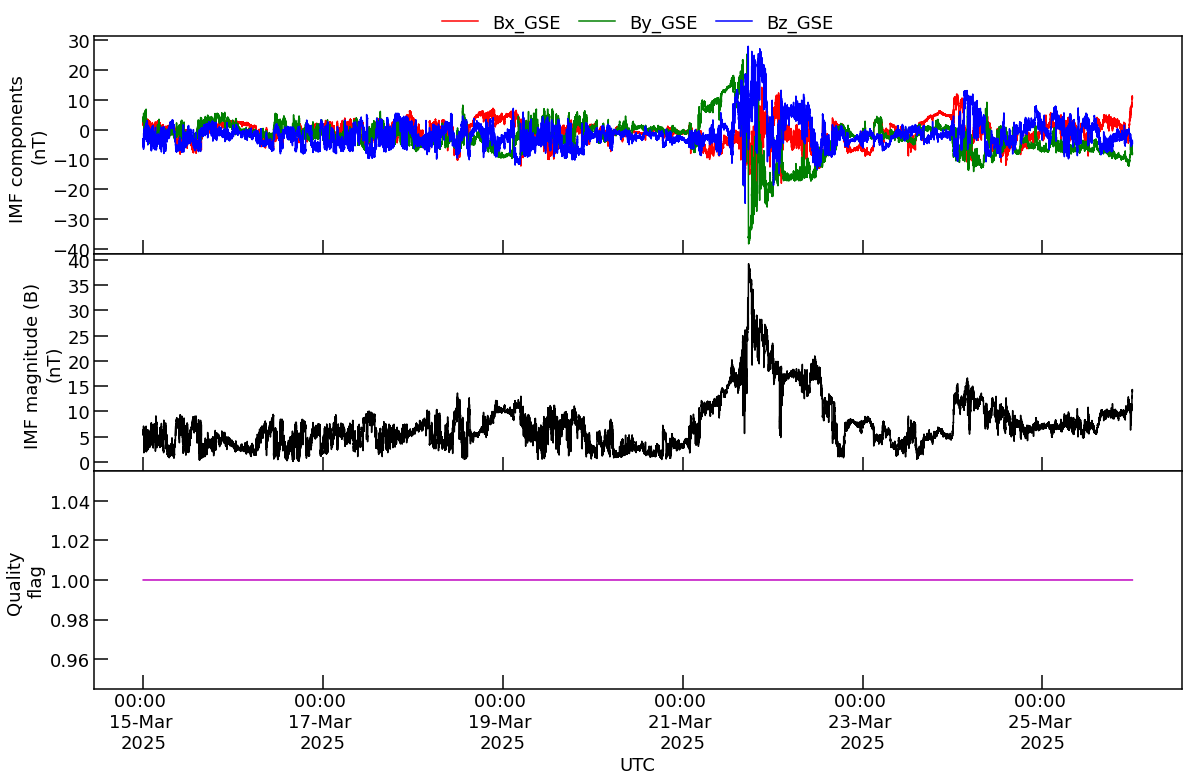

In [6]:
# Reading MAG/Aditya-l1 data (in GSE coordinate system)
file_2='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\AL1_MAG\mag_2026Jan15T141936793\\'
file_2_list=os.listdir(file_2)
file = file_2+file_2_list[0]

nc_file = nc.Dataset(file, 'r')
# print(nc_file)
# variables = nc_file.variables.keys()
# # print(variables)

# # --- Global attributes ---
# print("Global attributes:")
# for attr in nc_file.ncattrs():
#     print(f"{attr} = {getattr(nc_file, attr)}")

# # --- Variable attributes ---
# print("\nVariable attributes:")
# for var_name, var in nc_file.variables.items():
#     print(f"\nVariable: {var_name}")
#     for attr in var.ncattrs():
#         print(f"  {attr} = {getattr(var, attr)}")
              
time_al1_mag = nc_file.variables['time'][:]
# print(time_aditya_mag[0:10])

Bx_gse_al1_mag= nc_file.variables['Bx_gse'][:]
By_gse_al1_mag= nc_file.variables['By_gse'][:]
Bz_gse_al1_mag= nc_file.variables['Bz_gse'][:]

q_flag_al1_mag= nc_file.variables['Quality_flag_10s_data'][:]
del file, nc_file

for i in range(1,len(file_2_list)): 
    file = file_2+file_2_list[i]
    nc_file = nc.Dataset(file, 'r')
    
    time=nc_file.variables['time'][:]
    time_al1_mag=np.concatenate((time_al1_mag, time), axis=0)
    del time
    
    bx=nc_file.variables['Bx_gse'][:]
    Bx_gse_al1_mag=np.concatenate((Bx_gse_al1_mag, bx), axis=0)
    del bx
    
    by=nc_file.variables['By_gse'][:]
    By_gse_al1_mag=np.concatenate((By_gse_al1_mag, by), axis=0)
    del by
    
    bz=nc_file.variables['Bz_gse'][:]
    Bz_gse_al1_mag=np.concatenate((Bz_gse_al1_mag, bz), axis=0)
    del bz
    
    q=nc_file.variables['Quality_flag_10s_data'][:]
    q_flag_al1_mag=np.concatenate((q_flag_al1_mag, q), axis=0)
    del q
    
    del i, file, nc_file
    
time_al1_mag = pd.to_datetime(time_al1_mag, unit='s', utc=True)
B_gse_al1_mag = np.sqrt(Bx_gse_al1_mag**2 + By_gse_al1_mag**2 + Bz_gse_al1_mag**2)

# print(len(q_flag_al1_mag))
# Plot the variables 
t1=datetime(2025, 3, 15, 0, 0, 0, tzinfo=timezone.utc) 
t2=datetime(2025, 3, 26, 0, 0, 0, tzinfo=timezone.utc)
fonts=18
 
fig=plt.figure(2, figsize=(19.5, 12))
gs=fig.add_gridspec(3, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=False)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_al1_mag > t1))
n2=np.max(np.where(time_al1_mag < t2))
#---------------------------------------------------------------------------------------------
ax[0].plot(time_al1_mag[n1:n2+1], Bx_gse_al1_mag[n1:n2+1], '-', color='r', linewidth=1.5, label='Bx_GSE')
ax[0].plot(time_al1_mag[n1:n2+1], By_gse_al1_mag[n1:n2+1], '-', color='g', linewidth=1.5, label='By_GSE')
ax[0].plot(time_al1_mag[n1:n2+1], Bz_gse_al1_mag[n1:n2+1], '-', color='b', linewidth=1.5, label='Bz_GSE')
ax[0].legend(ncol=3, loc='upper center', frameon=False, fontsize=fonts, markerscale=4., columnspacing =1.0, bbox_to_anchor=(0.5, 1.18))
ax[0].set_ylabel('IMF components \n(nT)', fontsize=fonts)
ax[0].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[0].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[0].spines.values()]
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(fonts)

ax[1].plot(time_al1_mag[n1:n2+1], B_gse_al1_mag[n1:n2+1], '-', color='k', linewidth=1.5)
ax[1].set_ylabel('IMF magnitude (B) \n(nT)', fontsize=fonts)
ax[1].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[1].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[1].spines.values()]
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(fonts)

ax[2].plot(time_al1_mag[n1:n2+1], q_flag_al1_mag[n1:n2+1], '-', color='m', linewidth=1.5)
ax[2].set_ylabel('Quality \nflag', fontsize=fonts)
ax[2].set_xlabel('UTC', fontsize=fonts)
ax[2].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[2].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[2].spines.values()]
for label in (ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    label.set_fontsize(fonts)

myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[2].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, gs, ax, n1, n2, t1, t2, fonts


**Sometimes, plotting different components of IMF (or velocity) gives better understanding of many structures**

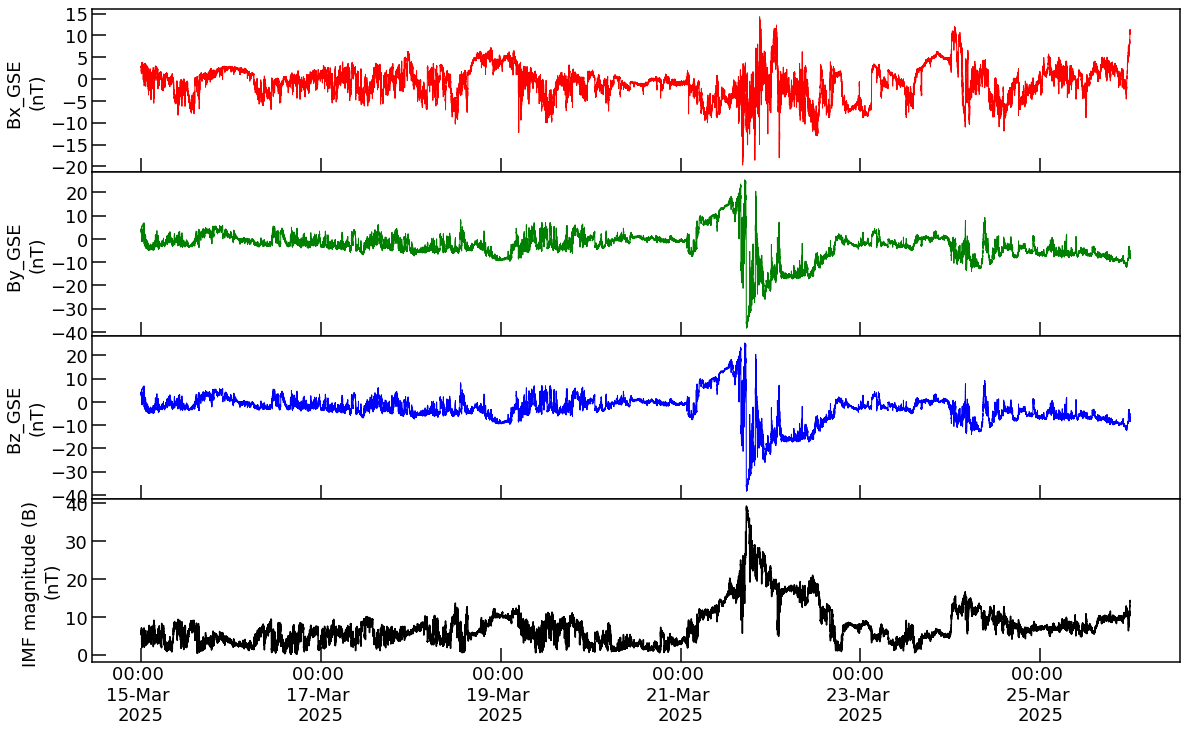

In [8]:
# Plotting different components of IMF in different panels
t1=datetime(2025, 3, 15, 0, 0, 0, tzinfo=timezone.utc) 
t2=datetime(2025, 3, 26, 0, 0, 0, tzinfo=timezone.utc)
fonts=18
 
fig=plt.figure(4, figsize=(19.5, 12))
gs=fig.add_gridspec(4, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=False)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_al1_mag > t1))
n2=np.max(np.where(time_al1_mag < t2))
#---------------------------------------------------------------------------------------------
ax[0].plot(time_al1_mag[n1:n2+1], Bx_gse_al1_mag[n1:n2+1], '-', color='r', linewidth=1.)
ax[0].set_ylabel('Bx_GSE \n(nT)', fontsize=fonts)
ax[0].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[0].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[0].spines.values()]
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(fonts)
    
ax[1].plot(time_al1_mag[n1:n2+1], By_gse_al1_mag[n1:n2+1], '-', color='g', linewidth=1.)
ax[1].set_ylabel('By_GSE \n(nT)', fontsize=fonts)
ax[1].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[1].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[1].spines.values()]
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(fonts)
    
ax[2].plot(time_al1_mag[n1:n2+1], By_gse_al1_mag[n1:n2+1], '-', color='b', linewidth=1.)
ax[2].set_ylabel('Bz_GSE \n(nT)', fontsize=fonts)
ax[2].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[2].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[2].spines.values()]
for label in (ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    label.set_fontsize(fonts)

ax[3].plot(time_al1_mag[n1:n2+1], B_gse_al1_mag[n1:n2+1], '-', color='k', linewidth=1.5)
ax[3].set_ylabel('IMF magnitude (B) \n(nT)', fontsize=fonts)
ax[3].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[3].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[3].spines.values()]
for label in (ax[3].get_xticklabels() + ax[3].get_yticklabels()):
    label.set_fontsize(fonts)


myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[3].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, gs, ax, n1, n2, t1, t2, fonts


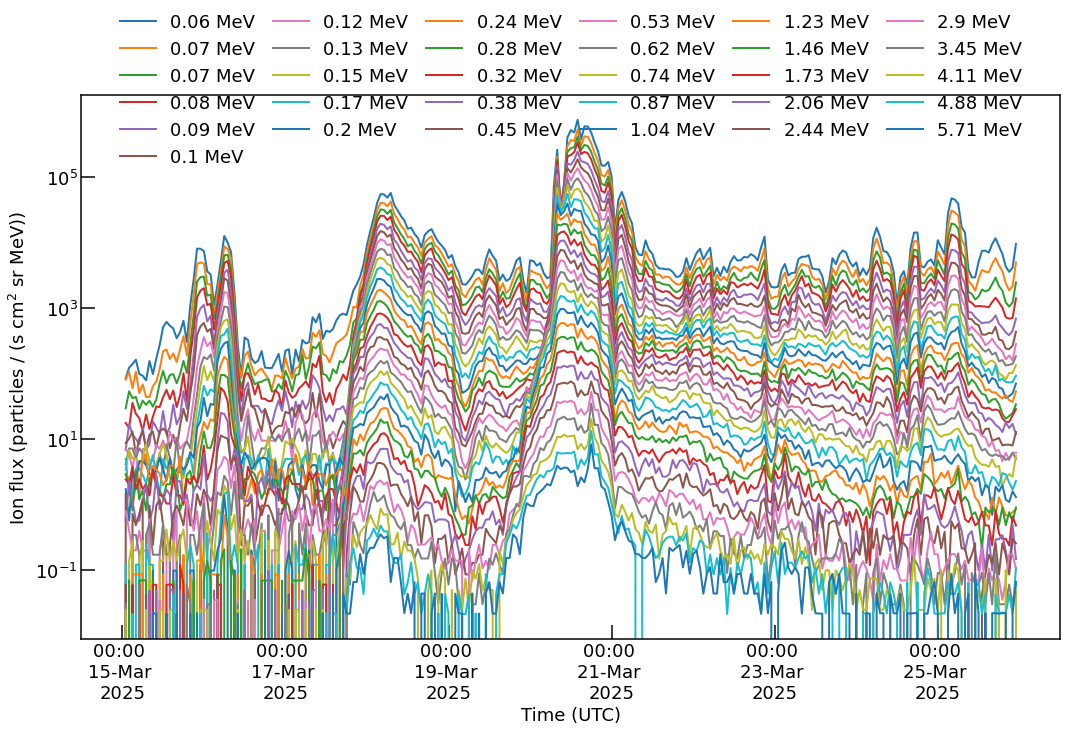

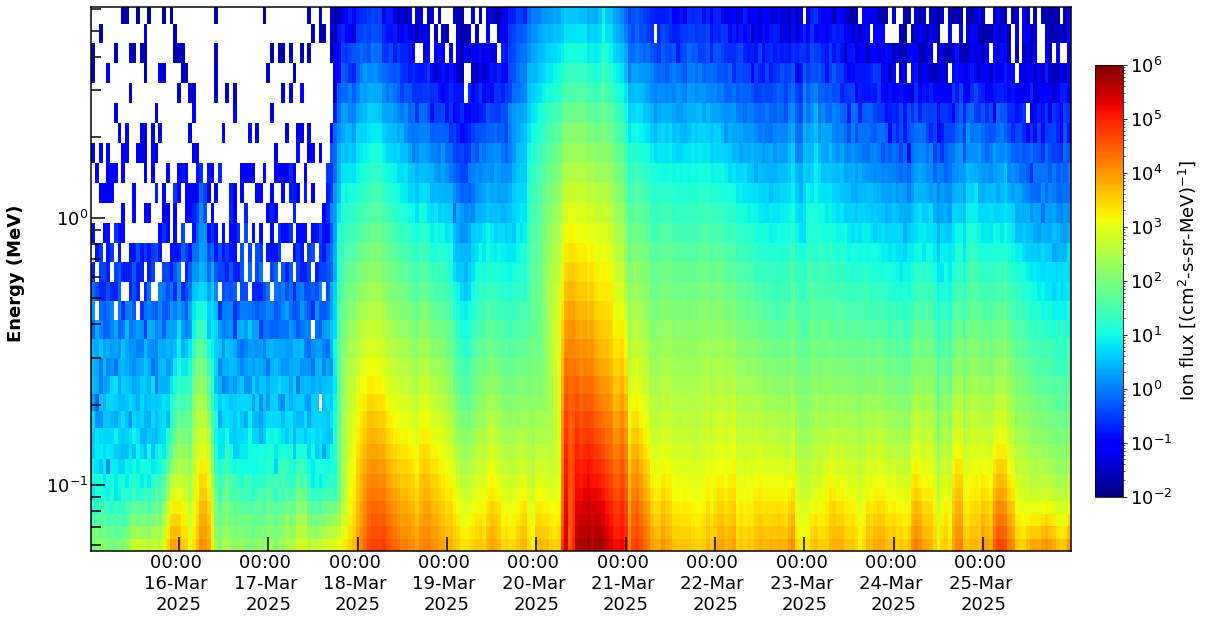

In [45]:
# Reading Solar Orbiter EPT/EPD data (Sun looking telescope)
file='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\SolO_EPD_EPT\\solo_l3s_epd-ept-1hour_20250315000000_20250326000000_cdaweb.cdf'

cdf_data = pycdf.CDF(file)
variable_names = cdf_data.keys()
# print(variable_names)
# # ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
# # ---------------------------------------------------------------------------------------------
time_ept_solo=cdf_data['EPOCH']
# print(len(time_ept_solo))
# print(time_ept_solo[0:10])
# print(np.dtype(time_ept_solo))
# print(np.size(energy_ept_solo))

flux_ept_solo=cdf_data['Ion_Flux_S']
energy_ept_solo=cdf_data['Ion_Energy']

# Plot the data
t1=datetime(2025, 3, 15, 0, 0, 0) 
t2=datetime(2025, 3, 26, 0, 0, 0)
fonts=18
 
fig=plt.figure(4, figsize=(19.5, 10))
gs=fig.add_gridspec(1, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=True)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_ept_solo[:] > t1))
n2=np.max(np.where(time_ept_solo[:] < t2))
# n1 = int((time_ept_solo > t1).argmax())
# n2 = int((time_ept_solo < t2).argmin())

for i in range(0, len(energy_ept_solo[:])):
    ax.semilogy(time_ept_solo[n1:n2+1], flux_ept_solo[n1:n2+1, i], '-', markersize=4, linewidth=2., \
                    label=f'{np.round(energy_ept_solo[i], 2)} MeV')
    del i

ax.legend(ncol=6, loc='upper center', frameon=False, fontsize=fonts, markerscale=4., \
       columnspacing =1.0, bbox_to_anchor=(0.5, 1.18))
ax.set_ylabel('Ion flux (particles / (s cm$^{2}$ sr MeV))', fontsize=fonts)
ax.set_xlabel('Time (UTC)', fontsize=fonts)
box=ax.get_position()
ax.set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
ax.tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax.tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax.spines.values()]
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fonts)

myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax.xaxis.set_major_formatter(myFmt)
del myFmt
                             
del ax, fig, gs

# =========================Plotting the fluxes in color plots============================
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator, LogFormatterMathtext
from matplotlib.ticker import MaxNLocator 

fig=plt.figure(5, figsize=(19.5, 10))
gs=fig.add_gridspec(1, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=True)

vmin=1e-2
vmax=1e6
smooth_factor=500
# original_cmap = plt.cm.coolwarm
# colors = original_cmap(np.linspace(0, 1, 256))
# intense_colors = np.clip(colors * 1.2, 0, 1)  # Scale RGB values
# intense_cmap = ListedColormap(intense_colors)

# Use pcolormesh for the color plot
X, Y = np.meshgrid(time_ept_solo[n1:n2+1], energy_ept_solo[:]) 
Z= np.transpose(flux_ept_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax.pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax.set_yscale('log')
box=ax.get_position()
ax.set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
ax.tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax.tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax.spines.values()]
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fonts)


cbar_ax = fig.add_axes([0.83, 0.2, 0.02, 0.6])  # Position to the right of the plot
cbar = fig.colorbar(flux_plot, cax=cbar_ax, shrink=0.8, aspect=20)
cbar.formatter = LogFormatterMathtext(base=10)  # Ensure all ticks are shown in 10^x format
cbar.update_ticks()
cbar.ax.tick_params(labelsize=fonts)
cbar.set_label('Ion flux [(cm$^2$-s-sr-MeV)$^{{-1}}$]', fontsize=fonts)

del flux_plot, cbar_ax, cbar

fig.text(0.055, 0.42, 'Energy (MeV)', fontsize=fonts, fontweight='bold', rotation=90)
# Format the x and y axes
myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax.xaxis.set_major_formatter(myFmt)

del fig, ax, gs, myFmt


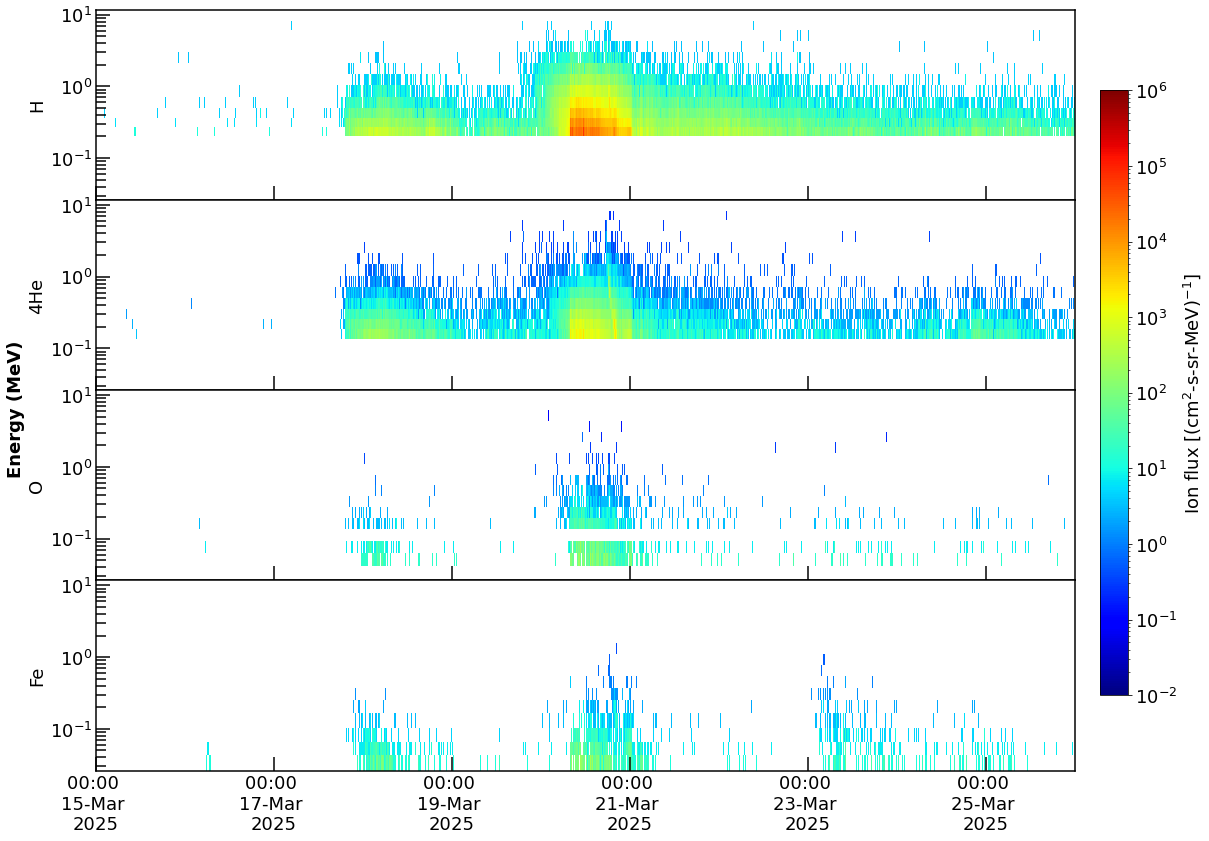

In [44]:
# Reading the Solar Orbiter SIS-A data 
file='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\SolO_EPD_SIS_A\\solo_l2s_epd-sis-a-rates-medium_20250315000007_20250325235939_cdaweb.cdf'

cdf_data = pycdf.CDF(file)
# variable_names = cdf_data.keys()
# print(variable_names)
# # ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
# # ---------------------------------------------------------------------------------------------
time_sisa_solo=cdf_data['EPOCH']
# print(len(time_ept_solo))
# print(time_sisa_solo[0:10])
# print(np.dtype(time_ept_solo))
# print(np.size(energy_ept_solo))

H_flux_sisa_solo=cdf_data['H_Flux']
H_flux_sisa_solo[:, :][H_flux_sisa_solo[:, :] < 0]='nan'
E_H_sisa_solo=cdf_data['H_Bins_Low_Energy']

# print(E_H_sisa_solo[:])


He4_flux_sisa_solo=cdf_data['He4_Flux']
E_He4_sisa_solo=cdf_data['He4_Bins_Low_Energy']

O_flux_sisa_solo=cdf_data['O_Flux']
E_O_sisa_solo=cdf_data['O_Bins_Low_Energy']

Fe_flux_sisa_solo=cdf_data['Fe_Flux']
E_Fe_sisa_solo=cdf_data['Fe_Bins_Low_Energy']

# Plotting the SIS-A/EPD data
t1=datetime(2025, 3, 15, 0, 0, 0) 
t2=datetime(2025, 3, 26, 0, 0, 0)
fonts=18

vmin=1e-2
vmax=1e6
smooth_factor=500

fig=plt.figure(7, figsize=(19.5, 14))
gs=fig.add_gridspec(4, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=True)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_sisa_solo[:] > t1))
n2=np.max(np.where(time_sisa_solo[:] < t2))

# Use pcolormesh for the color plot
X, Y = np.meshgrid(time_sisa_solo[n1:n2+1], E_H_sisa_solo[:]) 
Z= np.transpose(H_flux_sisa_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[0].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax[0].set_yscale('log')
ax[0].set_ylabel('H', fontsize=fonts)
box=ax[0].get_position()
ax[0].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
ax[0].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[0].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[0].spines.values()]
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(fonts)
del X, Y, Z

X, Y = np.meshgrid(time_sisa_solo[n1:n2+1], E_He4_sisa_solo[:]) 
Z= np.transpose(He4_flux_sisa_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[1].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax[1].set_yscale('log')
ax[1].set_ylabel('4He', fontsize=fonts)
box=ax[1].get_position()
ax[1].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
del X, Y, Z
ax[1].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[1].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[1].spines.values()]
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(fonts)

X, Y = np.meshgrid(time_sisa_solo[n1:n2+1], E_O_sisa_solo[:]) 
Z= np.transpose(O_flux_sisa_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[2].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax[2].set_yscale('log')
ax[2].set_ylabel('O', fontsize=fonts)
box=ax[2].get_position()
ax[2].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
del X, Y, Z
ax[2].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[2].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[2].spines.values()]
for label in (ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    label.set_fontsize(fonts)

X, Y = np.meshgrid(time_sisa_solo[n1:n2+1], E_Fe_sisa_solo[:]) 
Z= np.transpose(Fe_flux_sisa_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[3].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax[3].set_yscale('log')
ax[3].set_ylabel('Fe', fontsize=fonts)
box=ax[3].get_position()
ax[3].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
del X, Y, Z
ax[3].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[3].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[3].spines.values()]
for label in (ax[3].get_xticklabels() + ax[3].get_yticklabels()):
    label.set_fontsize(fonts)

cbar_ax = fig.add_axes([0.83, 0.2, 0.02, 0.6])  # Position to the right of the plot
cbar = fig.colorbar(flux_plot, cax=cbar_ax, shrink=0.8, aspect=20)
cbar.formatter = LogFormatterMathtext(base=10)  # Ensure all ticks are shown in 10^x format
cbar.update_ticks()
cbar.ax.tick_params(labelsize=fonts)
cbar.set_label('Ion flux [(cm$^2$-s-sr-MeV)$^{{-1}}$]', fontsize=fonts)

del flux_plot, cbar_ax, cbar

fig.text(0.052, 0.42, 'Energy (MeV)', fontsize=fonts, fontweight='bold', rotation=90)
# Format the x and y axes
myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[3].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, ax, gs

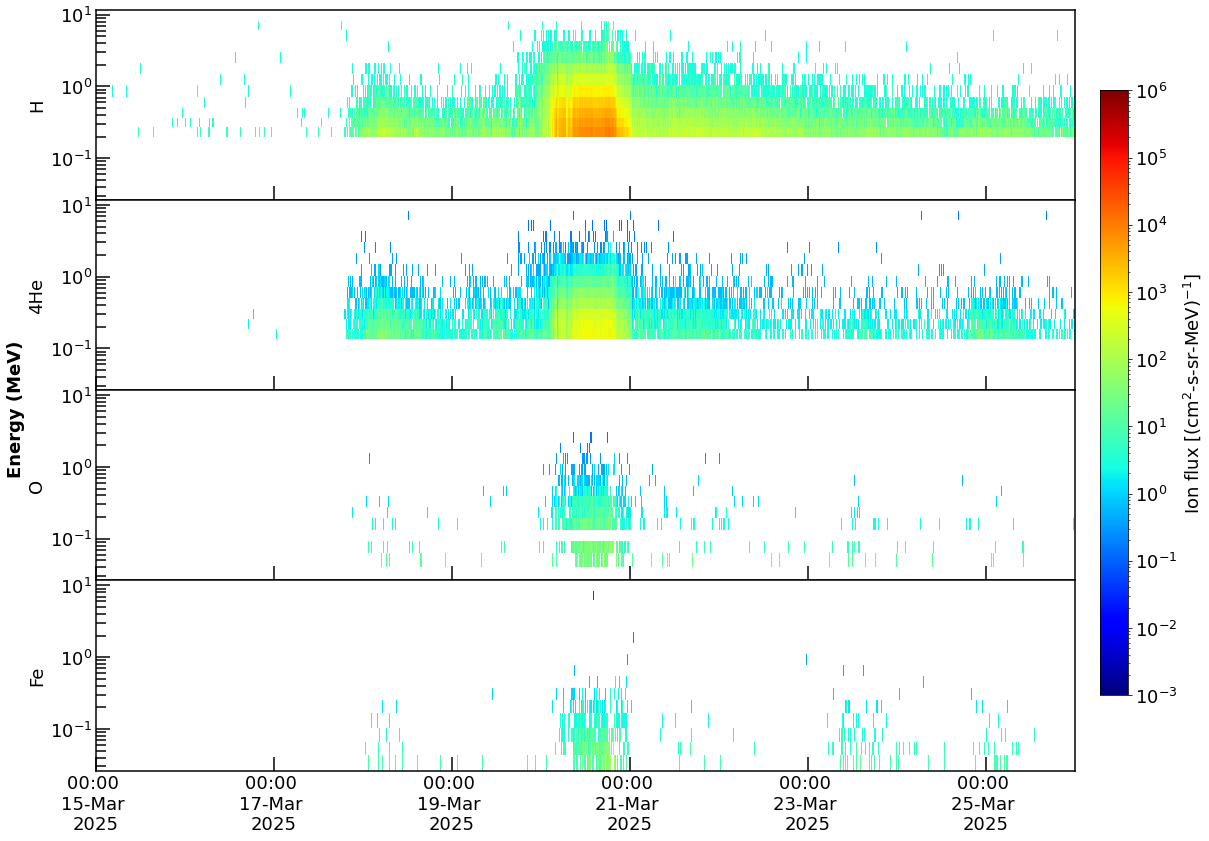

In [43]:
# Reading the Solar Orbiter SIS-B data 
file='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\SolO_EPD_SIS_B\\solo_l2s_epd-sis-b-rates-medium_20250315000007_20250325235939_cdaweb.cdf'

cdf_data = pycdf.CDF(file)
# variable_names = cdf_data.keys()
# print(variable_names)
# # ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
# # ---------------------------------------------------------------------------------------------
time_sisb_solo=cdf_data['EPOCH']
# print(len(time_ept_solo))
# print(time_sisa_solo[0:10])
# print(np.dtype(time_ept_solo))
# print(np.size(energy_ept_solo))

H_flux_sisb_solo=cdf_data['H_Flux']
H_flux_sisb_solo[:, :][H_flux_sisa_solo[:, :] < 0]='nan'
E_H_sisb_solo=cdf_data['H_Bins_Low_Energy']

# print(E_H_sisa_solo[:])
He4_flux_sisb_solo=cdf_data['He4_Flux']
E_He4_sisb_solo=cdf_data['He4_Bins_Low_Energy']

O_flux_sisb_solo=cdf_data['O_Flux']
E_O_sisb_solo=cdf_data['O_Bins_Low_Energy']

Fe_flux_sisb_solo=cdf_data['Fe_Flux']
E_Fe_sisb_solo=cdf_data['Fe_Bins_Low_Energy']

# Plotting the SIS-A/EPD data
t1=datetime(2025, 3, 15, 0, 0, 0) 
t2=datetime(2025, 3, 26, 0, 0, 0)
fonts=18

vmin=1e-3
vmax=1e6
smooth_factor=500

fig=plt.figure(7, figsize=(19.5, 14))
gs=fig.add_gridspec(4, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=True)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_sisb_solo[:] > t1))
n2=np.max(np.where(time_sisb_solo[:] < t2))

# Use pcolormesh for the color plot
X, Y = np.meshgrid(time_sisb_solo[n1:n2+1], E_H_sisb_solo[:]) 
Z= np.transpose(H_flux_sisb_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[0].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax[0].set_yscale('log')
ax[0].set_ylabel('H', fontsize=fonts)
box=ax[0].get_position()
ax[0].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
ax[0].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[0].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[0].spines.values()]
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(fonts)
del X, Y, Z

X, Y = np.meshgrid(time_sisb_solo[n1:n2+1], E_He4_sisb_solo[:]) 
Z= np.transpose(He4_flux_sisb_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[1].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
 # Shading for better appearance
ax[1].set_yscale('log')
ax[1].set_ylabel('4He', fontsize=fonts)
box=ax[1].get_position()
ax[1].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
del X, Y, Z
ax[1].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[1].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[1].spines.values()]
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(fonts)

X, Y = np.meshgrid(time_sisb_solo[n1:n2+1], E_O_sisb_solo[:]) 
Z= np.transpose(O_flux_sisb_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[2].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  
ax[2].set_yscale('log')
ax[2].set_ylabel('O', fontsize=fonts)
box=ax[2].get_position()
ax[2].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
del X, Y, Z
ax[2].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[2].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[2].spines.values()]
for label in (ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    label.set_fontsize(fonts)

X, Y = np.meshgrid(time_sisb_solo[n1:n2+1], E_Fe_sisb_solo[:]) 
Z= np.transpose(Fe_flux_sisb_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
flux_plot = ax[3].pcolormesh(X, Y, Z, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
ax[3].set_yscale('log')
ax[3].set_ylabel('Fe', fontsize=fonts)
box=ax[3].get_position()
ax[3].set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box
del X, Y, Z
ax[3].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[3].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[3].spines.values()]
for label in (ax[3].get_xticklabels() + ax[3].get_yticklabels()):
    label.set_fontsize(fonts)

cbar_ax = fig.add_axes([0.83, 0.2, 0.02, 0.6])  # Position to the right of the plot
cbar = fig.colorbar(flux_plot, cax=cbar_ax, shrink=0.8, aspect=20)
cbar.formatter = LogFormatterMathtext(base=10)  # Ensure all ticks are shown in 10^x format
cbar.update_ticks()
cbar.ax.tick_params(labelsize=fonts)
cbar.set_label('Ion flux [(cm$^2$-s-sr-MeV)$^{{-1}}$]', fontsize=fonts)

del flux_plot, cbar_ax, cbar

fig.text(0.052, 0.42, 'Energy (MeV)', fontsize=fonts, fontweight='bold', rotation=90)
# Format the x and y axes
myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[3].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, ax, gs

In [28]:
# Reading the Solar Orbiter STEP/EPD data
file='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\SolO_EPD-STEP\\solo_ll02s_epd-step-rates_20250315000039_20250325235941_cdaweb.cdf'

cdf_data = pycdf.CDF(file)
variable_names = cdf_data.keys()
# print(variable_names)
# # ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
# # ---------------------------------------------------------------------------------------------

time_step_solo=cdf_data['EPOCH']
# print(time_step_solo[0:10])

flux_step_solo=cdf_data['Ion_Flux']
# Remove the fill values

flux_step_solo = np.array(flux_step_solo, dtype=float)
flux_step_solo[flux_step_solo < 0] = np.nan

energy_step_solo=cdf_data['Ion_Bins_Low_Energy']
# print(energy_step_solo[:])

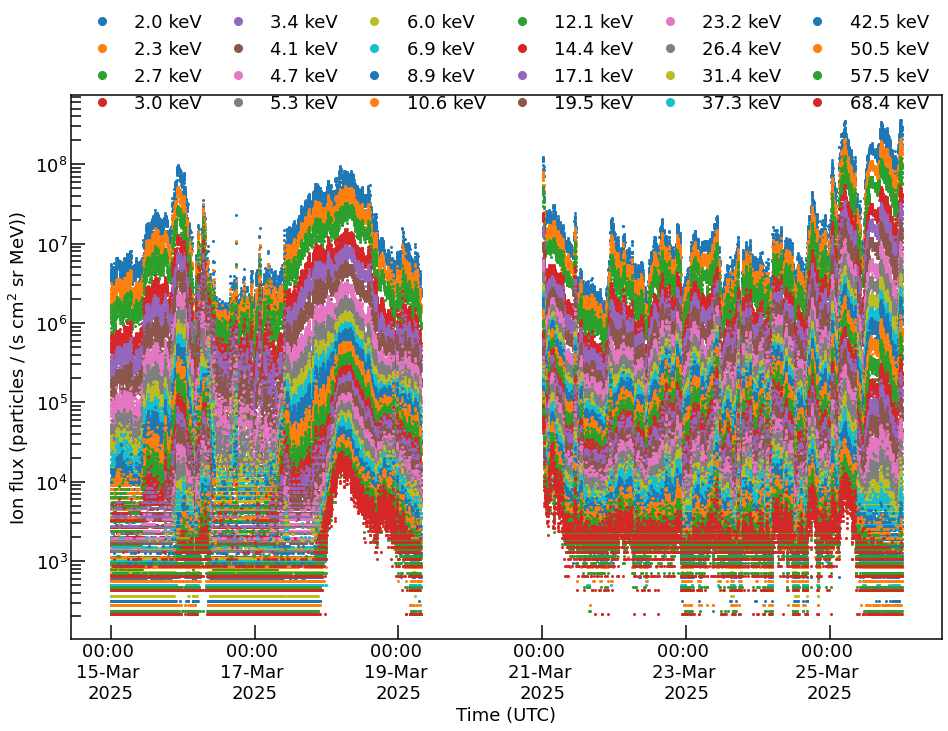

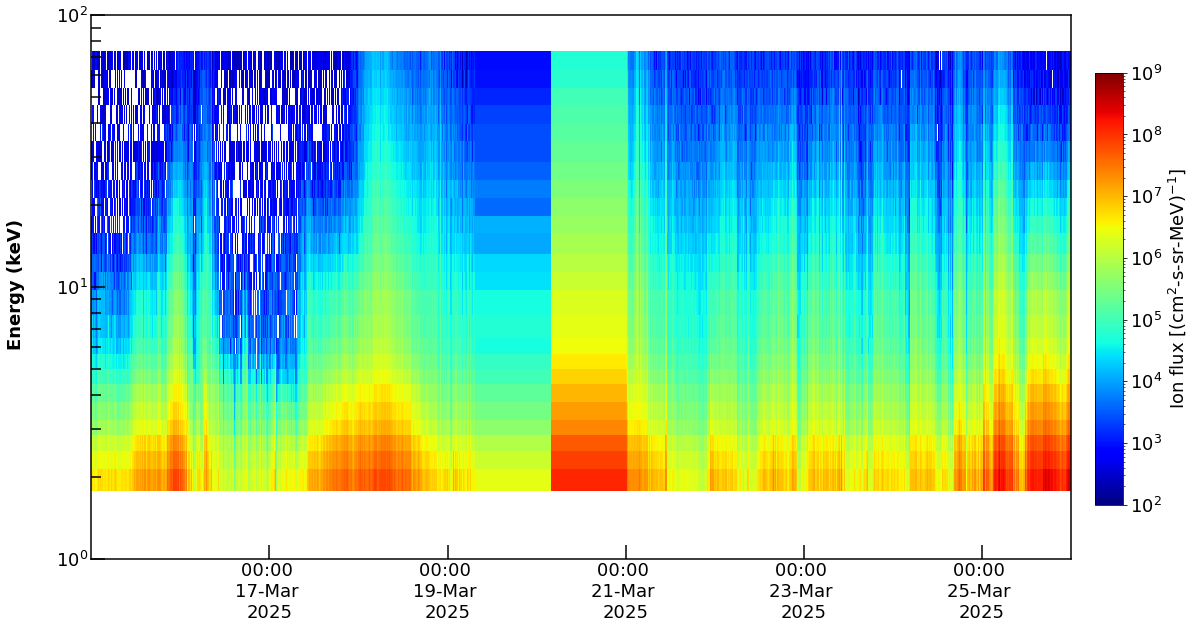

In [34]:
# Plot the data
t1=datetime(2025, 3, 15, 0, 0, 0) 
t2=datetime(2025, 3, 26, 0, 0, 0)
fonts=18
 
fig=plt.figure(9, figsize=(19.5, 10))
gs=fig.add_gridspec(1, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=True)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_step_solo[:] > t1))
n2=np.max(np.where(time_step_solo[:] < t2))

for i in range(0, len(energy_step_solo[:])):
    ax.semilogy(time_step_solo[n1:n2+1], flux_step_solo[n1:n2+1, i], '.', markersize=4, linewidth=2., \
                    label=f'{np.round(energy_step_solo[i]*1000, 1)} keV')
    del i

ax.legend(ncol=6, loc='upper center', frameon=False, fontsize=fonts, markerscale=4., \
       columnspacing =1.0, bbox_to_anchor=(0.5, 1.18))
ax.set_ylabel('Ion flux (particles / (s cm$^{2}$ sr MeV))', fontsize=fonts)
ax.set_xlabel('Time (UTC)', fontsize=fonts)
ax.tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax.tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax.spines.values()]
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fonts)  
    
box=ax.get_position()
ax.set_position([box.x0-0.01, box.y0, box.width*0.8, box.height])  

myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax.xaxis.set_major_formatter(myFmt)
del myFmt
del ax, fig, gs

#==================Plot a colormap=====================================
# Use pcolormesh for the color plot
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator, LogFormatterMathtext
from matplotlib.ticker import MaxNLocator 

fig=plt.figure(10, figsize=(19.5, 10))
gs=fig.add_gridspec(1, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=True)

vmin=1e2
vmax=1e9
smooth_factor=500

# X, Y = np.meshgrid(time_step_solo[n1:n2+1], energy_step_solo[:]*1000) 
# Z= np.transpose(flux_step_solo[n1:n2+1, :])# Create meshgrid for energy and datetime
# flux_plot = ax.contourf(X, Y, Z, levels=smooth_factor, cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))  # Shading for better appearance
# ax.set_yscale('log')

Z = np.transpose(flux_step_solo[n1:n2+1, :])

Z_masked = np.ma.masked_invalid(Z)
Z_masked = np.ma.masked_where(Z_masked <= 0, Z_masked)  # required for LogNorm

cmap = plt.cm.jet.copy()
cmap.set_bad('white')

flux_plot = ax.pcolormesh(
    X, Y, Z_masked,
    cmap=cmap,
    norm=LogNorm(vmin=vmin, vmax=vmax),
    shading='nearest'
)

ax.set_yscale('log')

ax.set_ylim([1e0, 1e2])
box=ax.get_position()
ax.set_position([box.x0-0.01, box.y0, box.width*0.9, box.height])  
del box

ax.tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax.tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax.spines.values()]
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fonts)

cbar_ax = fig.add_axes([0.83, 0.2, 0.02, 0.6])  # Position to the right of the plot
cbar = fig.colorbar(flux_plot, cax=cbar_ax, shrink=0.8, aspect=20)
cbar.formatter = LogFormatterMathtext(base=10)  # Ensure all ticks are shown in 10^x format
cbar.update_ticks()
cbar.ax.tick_params(labelsize=fonts)
cbar.set_label('Ion flux [(cm$^2$-s-sr-MeV)$^{{-1}}$]', fontsize=fonts)

del flux_plot, cbar_ax, cbar

fig.text(0.055, 0.42, 'Energy (keV)', fontsize=fonts, fontweight='bold', rotation=90)
# Format the x and y axes
myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax.xaxis.set_major_formatter(myFmt)
del myFmt


KeysView(<CDF:
B: CDF_FLOAT [265]
BN: CDF_FLOAT [265]
BR: CDF_FLOAT [265]
BT: CDF_FLOAT [265]
Epoch: CDF_EPOCH [265]
ProtonSpeed: CDF_FLOAT [265]
VN: CDF_FLOAT [265]
VR: CDF_FLOAT [265]
VT: CDF_FLOAT [265]
protonDensity: CDF_FLOAT [265]
protonTemp: CDF_FLOAT [265]
radialDistance: CDF_FLOAT [265]
>)


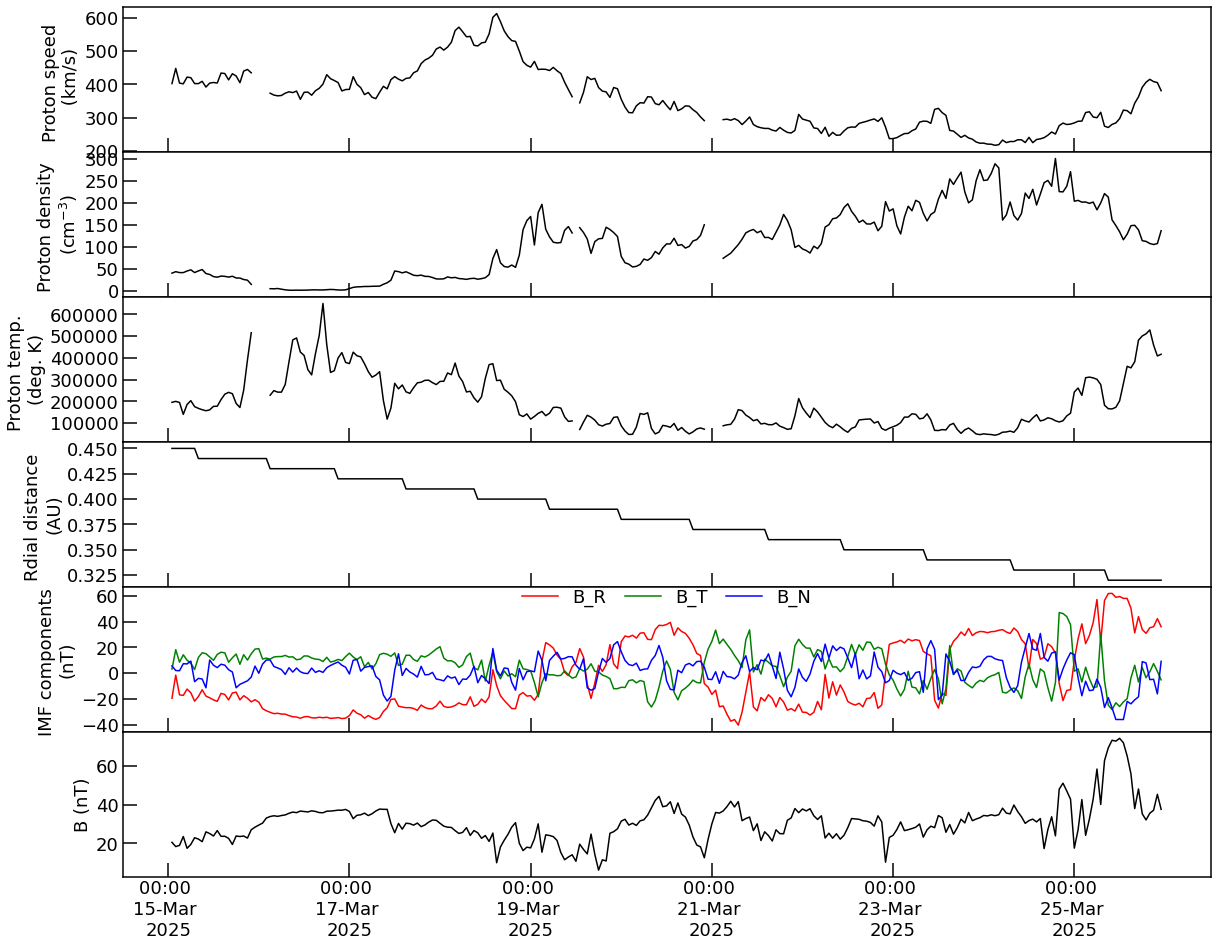

In [128]:
# Reading Solar Orbiter solar wind parameters
file='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\science_workflow_insitu\\Data for science workflow\\SolO_solarwind_parameters\\solo_coho1hrs_merged_mag_plasma_20250315000000_20250326000000_cdaweb.cdf'

cdf_data = pycdf.CDF(file)
variable_names = cdf_data.keys()
print(variable_names)
# # ----------------------------Chcecking global and variable attributes-----------------------
# global_attrs = cdf_data.attrs
# print("Global Attributes:")

# for attr, value in global_attrs.items():
#     print(f"{attr}: {value}")
    
# for var in variable_names:
#     print(f"\nAttributes of variable '{var}':")
#     for attr, value in cdf_data[var].attrs.items():
#         print(f"  {attr}: {value}")
# # ---------------------------------------------------------------------------------------------
time_sol_solo=cdf_data['Epoch']
# print(time_sol_solo[0:10])
Br_solo=cdf_data['BR']
Bn_solo=cdf_data['BN']
Bt_solo=cdf_data['BT']
B_solo=cdf_data['B']

p_speed_solo=cdf_data['ProtonSpeed']
p_density_solo=cdf_data['protonDensity']
rad_distance_solo=cdf_data['radialDistance']
p_temp_solo=cdf_data['protonTemp']

# idx=np.where(p_density_solo[:]<0)
# print(idx[:][0])

p_speed_solo=np.ma.masked_less(p_speed_solo, 0)
p_density_solo=np.ma.masked_less(p_density_solo, 0)
rad_distance_solo=np.ma.masked_less(rad_distance_solo, 0)
p_temp_solo=np.ma.masked_less(p_temp_solo, 0)

Br_solo=np.ma.masked_less(Br_solo, -500)
Bn_solo=np.ma.masked_less(Bn_solo, -500)
Bt_solo=np.ma.masked_less(Bt_solo, -500)
B_solo=np.ma.masked_less(B_solo, -500)

# Plot the parameters
t1=datetime(2025, 3, 15, 0, 0, 0) 
t2=datetime(2025, 3, 26, 0, 0, 0)
fonts=18
 
fig=plt.figure(12, figsize=(19.5, 16))
gs=fig.add_gridspec(6, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=False)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(time_sol_solo[:] > t1))
n2=np.max(np.where(time_sol_solo[:] < t2))

ax[0].plot(time_sol_solo[n1:n2+1], p_speed_solo[n1:n2+1], '-', color='k', linewidth=1.5)
ax[0].set_ylabel('Proton speed \n (km/s)', fontsize=fonts)
ax[0].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[0].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[0].spines.values()]
for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
    label.set_fontsize(fonts)

ax[1].plot(time_sol_solo[n1:n2+1], p_density_solo[n1:n2+1], '-', color='k', linewidth=1.5)
ax[1].set_ylabel('Proton density \n(cm$^{-3}$)', fontsize=fonts)
ax[1].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[1].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[1].spines.values()]
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
    label.set_fontsize(fonts)

ax[2].plot(time_sol_solo[n1:n2+1], p_temp_solo[n1:n2+1], '-', color='k', linewidth=1.5)
ax[2].set_ylabel('Proton temp. \n(deg. K)', fontsize=fonts)
ax[2].set_xlabel('UTC', fontsize=fonts)
ax[2].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[2].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[2].spines.values()]
for label in (ax[2].get_xticklabels() + ax[2].get_yticklabels()):
    label.set_fontsize(fonts)
    
ax[3].plot(time_sol_solo[n1:n2+1], rad_distance_solo[n1:n2+1], '-', color='k', linewidth=1.5)
ax[3].set_ylabel('Rdial distance \n(AU)', fontsize=fonts)
ax[3].set_xlabel('UTC', fontsize=fonts)
ax[3].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[3].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[3].spines.values()]
for label in (ax[3].get_xticklabels() + ax[3].get_yticklabels()):
    label.set_fontsize(fonts)

ax[4].plot(time_sol_solo[n1:n2+1], Br_solo[n1:n2+1], '-', color='r', linewidth=1.5, label='B_R')
ax[4].plot(time_sol_solo[n1:n2+1], Bt_solo[n1:n2+1], '-', color='g', linewidth=1.5, label='B_T')
ax[4].plot(time_sol_solo[n1:n2+1], Bn_solo[n1:n2+1], '-', color='b', linewidth=1.5, label='B_N')
ax[4].legend(ncol=3, loc='upper center', frameon=False, fontsize=fonts, markerscale=4., 
             columnspacing =1.0, bbox_to_anchor=(0.5, 1.1))
ax[4].set_ylabel('IMF components \n(nT)', fontsize=fonts)
ax[4].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[4].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[4].spines.values()]
for label in (ax[4].get_xticklabels() + ax[4].get_yticklabels()):
    label.set_fontsize(fonts)

ax[5].plot(time_sol_solo[n1:n2+1], B_solo[n1:n2+1], '-', color='k', linewidth=1.5)
ax[5].set_ylabel('B (nT)', fontsize=fonts)
ax[5].tick_params(which='major',direction='in', length=14, width=1.5, colors='k')
ax[5].tick_params(which='minor',direction='in', length=10, width=1.5, colors='k')
[x.set_linewidth(1.5) for x in ax[5].spines.values()]
for label in (ax[5].get_xticklabels() + ax[5].get_yticklabels()):
    label.set_fontsize(fonts)


myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[5].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, gs, ax, n1, n2, t1, t2, fonts


**Consult instrument papers of all the instruments, if necessary** 